In [61]:
import os
import seaborn as sns
import sklearn as sl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from cat_data import dummyEncode, plot_cat_info
from misc import uni_wage,generate_list
#plt.style.use('ggplot')
%matplotlib inline 

In [62]:
H1B_data = pd.read_csv('data/enigma-h1b.csv')
H1B_data = H1B_data[H1B_data["visa_class"] =="H-1B"]

In [63]:
H1B_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508676 entries, 0 to 508675
Data columns (total 36 columns):
lca_case_number                   508676 non-null object
status                            508676 non-null object
lca_case_submit                   508676 non-null object
decision_date                     508676 non-null object
visa_class                        508676 non-null object
lca_case_employment_start_date    508672 non-null object
lca_case_employment_end_date      508671 non-null object
lca_case_employer_name            508649 non-null object
lca_case_employer_address         508636 non-null object
lca_case_employer_city            508650 non-null object
lca_case_employer_state           508637 non-null object
lca_case_employer_postal_code     508637 non-null object
lca_case_soc_code                 508636 non-null object
lca_case_soc_name                 504458 non-null object
lca_case_job_title                508669 non-null object
lca_case_wage_rate_from           

In [64]:

time_h1b = H1B_data[["lca_case_submit","decision_date"]]
diff_ = (pd.to_datetime(time_h1b["decision_date"])-
                     pd.to_datetime(time_h1b["lca_case_submit"])
                    ).astype('timedelta64[D]')


In [65]:
pd.cut(diff_, [0,2,5,10,15,20,10000]).value_counts().sort_index()/len(diff_)

(0, 2]         0.007504
(2, 5]         0.166662
(5, 10]        0.717651
(10, 15]       0.010761
(15, 20]       0.001986
(20, 10000]    0.084195
dtype: float64

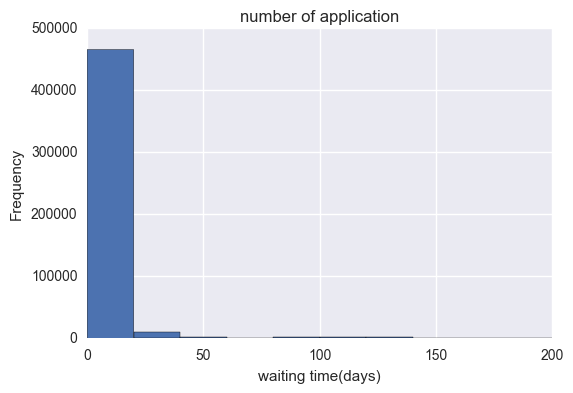

In [66]:
diff_.plot(kind="hist",bins= range(int(min(diff_)), 200 + 20, 20),label="waiting time")
plt.xlabel("waiting time(days)")
plt.title("number of application")

In [67]:
waiting_ratio = diff_/len(diff_)

Most of the applications waiting time are within 10 days

In [68]:
time_h1b = H1B_data[["lca_case_employment_start_date","lca_case_employment_end_date"]]
diff_ = (pd.to_datetime(time_h1b["lca_case_employment_end_date"])-
                     pd.to_datetime(time_h1b["lca_case_employment_start_date"])
                    ).astype('timedelta64[Y]')

In [69]:
pd.cut(diff_, [0,2,5,10,15,20,100]).value_counts().sort_index()/len(diff_)

(0, 2]       0.710063
(2, 5]       0.258027
(5, 10]      0.000000
(10, 15]     0.000000
(15, 20]     0.000000
(20, 100]    0.000000
dtype: float64

From the above statistic, most of the applicants have the chance to apply in 2 years. Also, there are no applicants who need visa greter than five years.

(0, 5)

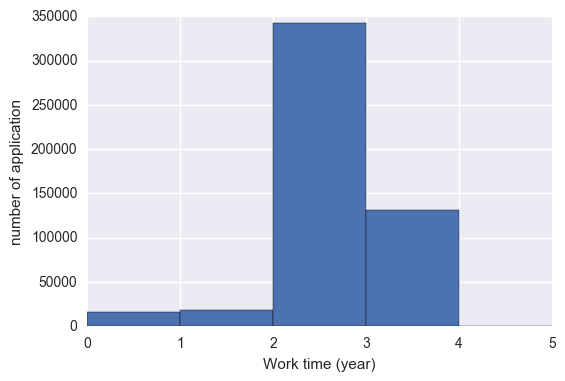

In [72]:
diff_.plot(kind="hist",bins= range(int(min(diff_)), 10 + 1, 1),label="waiting time")
plt.xlabel("Work time (year)")
plt.ylabel("number of application")
plt.xlim(0,5)